### Conexión a la base de datos

In [1]:
# Librerías requeridas para la conexión y muestra de información
import psycopg2 as ps
import pandas as pd
#parámetros de conexión, usar variables de entorno
host = "analitica.cvumttgeclul.us-east-1.rds.amazonaws.com"
port = '5432'
user = 'postgres'
password = 'Santiago0'
database = 'postgres'
# Conectar a la base de datos

try:
    connps = ps.connect(host=host,database=database,user=user,password=password,port=port)
except ps.OperationalError as e:
    raise e
else:
    print('Connected!')

Connected!


In [2]:
from sqlalchemy import create_engine

In [3]:
connAlchemy = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = connAlchemy.raw_connection()
cur = conn.cursor()

#### Lectura de la tabla "COVID"

In [4]:
# Leer los datos de la tabla "covid" en un dataframe de Pandas
df_fraccion = pd.read_sql('SELECT * FROM covid', conn).sample(frac=0.01, random_state=42)

# Mostrar las primeras filas del dataframe
df_fraccion.head()

C:\Users\Vanessa\AppData\Local\Temp\ipykernel_16440\1076544616.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_fraccion = pd.read_sql('SELECT * FROM covid', conn).sample(frac=0.01, random_state=42)


,caso,fecha_not,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,fuente_tipo_contagio,...,fecha_diagnostico,fecha_muerte,pais_viajo_1_cod,pais_viajo_1_nom,fecha_recuperado,recuperado,tipo_recuperacion,per_etn_,nom_grupo_,fecha_hoy_casos
3233193,2131333,2021-02-01 00:00:00,76,VALLE,76001,CALI,31,1,F,En estudio,...,2021-02-03 00:00:00,,,,2021-02-13 00:00:00,Recuperado,PCR,6.0,,2021-02-04 00:00:00
2310489,99419,2020-06-26 00:00:00,8,ATLANTICO,8520,PALMAR DE VARELA,34,1,F,Comunitaria,...,2020-07-01 00:00:00,,,,2020-07-16 00:00:00,Recuperado,PCR,6.0,,2020-07-01 00:00:00
2162027,4765161,2021-07-15 00:00:00,63,QUINDIO,63001,ARMENIA,17,1,M,Comunitaria,...,2021-07-26 00:00:00,,,,2021-07-30 00:00:00,Recuperado,Tiempo,6.0,,2021-07-29 00:00:00
4593956,3114375,2021-05-07 00:00:00,11,BOGOTA,11001,BOGOTA,72,1,F,En estudio,...,2021-05-06 00:00:00,,,,2021-05-20 00:00:00,Recuperado,Tiempo,6.0,,2021-05-16 00:00:00
474568,5479519,2022-01-03 00:00:00,47001,STA MARTA D.E.,47001,SANTA MARTA,28,1,F,En estudio,...,2022-01-14 00:00:00,,,,2022-01-16 00:00:00,Recuperado,Tiempo,6.0,,2022-01-15 00:00:00


##### Importación de librerías necesarias

In [5]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_fraccion.isna().sum()

caso                       0
fecha_not                  0
departamento               0
departamento_nom           0
ciudad_municipio           0
ciudad_municipio_nom       0
edad                       0
unidad_medida              0
sexo                       0
fuente_tipo_contagio       0
ubicacion                  0
estado                     0
fecha_inicio_sintomas      0
fecha_diagnostico          0
fecha_muerte               0
pais_viajo_1_cod           0
pais_viajo_1_nom           0
fecha_recuperado           0
recuperado                 0
tipo_recuperacion          0
per_etn_                 834
nom_grupo_                 0
fecha_hoy_casos            0
dtype: int64

In [7]:
df_fraccion.dropna()

,caso,fecha_not,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,fuente_tipo_contagio,...,fecha_diagnostico,fecha_muerte,pais_viajo_1_cod,pais_viajo_1_nom,fecha_recuperado,recuperado,tipo_recuperacion,per_etn_,nom_grupo_,fecha_hoy_casos
3233193,2131333,2021-02-01 00:00:00,76,VALLE,76001,CALI,31,1,F,En estudio,...,2021-02-03 00:00:00,,,,2021-02-13 00:00:00,Recuperado,PCR,6.0,,2021-02-04 00:00:00
2310489,99419,2020-06-26 00:00:00,8,ATLANTICO,8520,PALMAR DE VARELA,34,1,F,Comunitaria,...,2020-07-01 00:00:00,,,,2020-07-16 00:00:00,Recuperado,PCR,6.0,,2020-07-01 00:00:00
2162027,4765161,2021-07-15 00:00:00,63,QUINDIO,63001,ARMENIA,17,1,M,Comunitaria,...,2021-07-26 00:00:00,,,,2021-07-30 00:00:00,Recuperado,Tiempo,6.0,,2021-07-29 00:00:00
4593956,3114375,2021-05-07 00:00:00,11,BOGOTA,11001,BOGOTA,72,1,F,En estudio,...,2021-05-06 00:00:00,,,,2021-05-20 00:00:00,Recuperado,Tiempo,6.0,,2021-05-16 00:00:00
474568,5479519,2022-01-03 00:00:00,47001,STA MARTA D.E.,47001,SANTA MARTA,28,1,F,En estudio,...,2022-01-14 00:00:00,,,,2022-01-16 00:00:00,Recuperado,Tiempo,6.0,,2022-01-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737643,1854937,2021-01-08 00:00:00,19,CAUCA,19001,POPAYAN,25,1,M,Comunitaria,...,2021-01-12 00:00:00,,,,2021-01-18 00:00:00,Recuperado,Tiempo,6.0,,2021-01-15 00:00:00
2088597,4711429,2021-07-14 00:00:00,11,BOGOTA,11001,BOGOTA,79,1,F,En estudio,...,2021-07-14 00:00:00,,,,2021-07-28 00:00:00,Recuperado,Tiempo,6.0,,2021-07-24 00:00:00
3065475,2351213,2021-03-21 00:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,60,1,M,Relacionado,...,2021-03-21 00:00:00,,,,2021-03-30 00:00:00,Recuperado,Tiempo,6.0,,2021-03-24 00:00:00
3706885,1601045,2020-12-14 00:00:00,25,CUNDINAMARCA,25269,FACATATIVA,13,1,F,Comunitaria,...,2020-12-25 00:00:00,,,,2020-12-29 00:00:00,Recuperado,Tiempo,6.0,,2020-12-28 00:00:00


#### Análisis de los datos

Se eliminan aquellas columnas que no se considera aportan información relevante para el análisis deseado

In [8]:
df_fraccion = df_fraccion.drop(columns=['caso', 'fecha_not', 'departamento', 'ciudad_municipio', 'fecha_inicio_sintomas', 'fecha_diagnostico', 'fecha_muerte', 'pais_viajo_1_cod', 'pais_viajo_1_nom', 'fecha_recuperado', 'nom_grupo_', 'fecha_hoy_casos'])

#### Pre-procesamiento de los datos

Llamado de librerias a usar

In [9]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import numpy as np

In [10]:
# Codificación de atributos categóricos con one-hot encoding
encoder = OneHotEncoder(sparse=False)
categoricos_data = encoder.fit_transform(df_fraccion)

c:\Users\Vanessa\miniconda3\envs\unisabana\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
# Combinación de atributos categóricos y numéricos
combined_features = np.concatenate((df_fraccion, categoricos_data), axis=1)

In [17]:
# Calcular la inercia para diferentes valores de k en K-means,utilizo datos categoricos, datos numericos genera error.
inertias = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(categoricos_data)
    inertias.append(kmeans.inertia_)

c:\Users\Vanessa\miniconda3\envs\unisabana\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vanessa\miniconda3\envs\unisabana\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vanessa\miniconda3\envs\unisabana\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vanessa\miniconda3\envs\unisabana\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

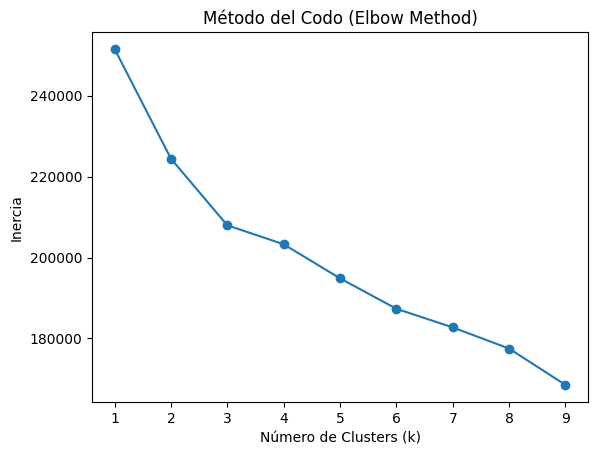

In [18]:
# Visualizar la curva de la inercia
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo (Elbow Method)')
plt.show()

In [20]:
# Obtener el número óptimo de clusters según el método del codo
optimal_k = 9  # Aquí se selecciona el 9 de acuerdo a grafica

In [21]:
# Aplicar K-modes a los atributos categóricos
kmodes = KModes(n_clusters=optimal_k, init='Huang', n_init=5, verbose=1)
clusters_kmodes = kmodes.fit_predict(categoricos_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20825, cost: 202179.0
Run 1, iteration: 2/100, moves: 3100, cost: 202179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13034, cost: 220391.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 16585, cost: 200978.0
Run 3, iteration: 2/100, moves: 878, cost: 200978.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12777, cost: 219220.0
Run 4, iteration: 2/100, moves: 4409, cost: 214385.0
Run 4, iteration: 3/100, moves: 277, cost: 214385.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11101, cost: 200125.0
Run 5, iteration: 2/100, moves: 0, cost: 200125.0
Best run was number 5


In [25]:
# Aplicar K-means a los atributos numéricos
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(categoricos_data)

c:\Users\Vanessa\miniconda3\envs\unisabana\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
# Combinar los resultados de K-modes y K-means
combined_clusters = np.column_stack((clusters_kmodes, clusters_kmeans))

In [27]:
# Imprimir los clusters resultantes
print("Clusters combinados:")
print(combined_clusters)

Clusters combinados:
[[5 3]
 [8 1]
 [2 5]
 ...
 [0 6]
 [6 1]
 [8 1]]


Según el tipo de columna de la base de datos se distingue entre númerica y categórica

In [ ]:
def get_column_type(df):
  labels=list(df.columns)
  A=[]
  B=[]

  for i in range(len(df.columns)):
    if np.dtype(df[labels[i]]) != 'object':
      A.append(labels[i])
    else:
      B.append(labels[i])

  return A,B

In [ ]:
# Aplicar K-means a los atributos numéricos
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict()

Se generarán gráficos del comportamiento de la variable 'y', de las variables 'x' y del comportamiento de la variable 'y' en función de las variables 'x', estos gráficos serán diagramas de barras si las variables son categóricas e histogramas si son númericas.

In [ ]:
def plot_y(df,label):
  A,B = get_column_type(df)
  if label in A:
    plt.hist(x=df[label])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


  else:
    df.groupby(label).agg(variable=(label,"count")).plot(kind="bar")

In [ ]:
from math import ceil
def plot_x(df,label):
  A,B= get_column_type(df)
  global fig,ax

  if label in A:
    B1=B.copy()
    A1=A.copy()
    A1.remove(label)
  else:
    A1=A.copy()
    B1=B.copy()
    B1.remove(label)

  #Graficar todas las x numericas   
  if not A1:
      print("")
  else:  
    n=ceil(len(A1)/2)
    print(n)
    fig, ax= plt.subplots(n,2, figsize=(10,12))
    for i,a in zip(A1,ax.ravel()): 
      #a.set_title(i)
      sns.histplot(x=i,data=df, ax=a)
      plt.tight_layout()
        
  #Graficar todas las x categoricas
  if not B1:
    print("")
  else:   
     n=ceil((len(B1))/2)
     fig, ax= plt.subplots(n,2, figsize=(10,12))
     for i,a in zip(B1,ax.ravel()): 
      sns.countplot(x=i,data=df, ax=a)
      a.set_title(i)

  return fig, ax

In [ ]:
def plot_xy(df,label):
  global fig, ax
  A,B= get_column_type(df)
  y=df[label].values

  #cuando y es numérica
  if label in A:
    A1=A.copy()
    A1.remove(label)
    # x númerica a y númerica
    if not A1:
      print('')
    else:
      n=ceil(len(A1)/2)
      fig, ax= plt.subplots(n,2,figsize=(10,12))
      for i,a in zip(A1, ax.ravel()):
          sns.scatterplot(x=i,y=label,data=df,ax=a)
          plt.tight_layout()
    # x categórica a y númerica
    if not B:
      print('')
    else:
      n=ceil(len(B)/2)
      fig, ax= plt.subplots(n,2, figsize=(10,12))
      plt.tight_layout()   
      for i,a in zip(B, ax.ravel()):
        sns.swarmplot(x=i,y=label,data=df,ax=a)
        plt.tight_layout()

  # Cuando y es categórica
  else:
    B1=B.copy()
    B1.remove(label)
    # x númerica a y categórica
    if not A:
      print('')
    else:
      n=ceil(len(A)/2)
      fig, ax= plt.subplots(n,2,figsize=(10,12))
      for i,a in zip(A, ax.ravel()):
        sns.histplot(x=i,hue=label,data=df,ax=a)
        plt.tight_layout()
    # x categórica a y categórica
    if not B1:
      print('')
    else:
      n=ceil(len(B1)/2)
      fig, ax= plt.subplots(n,2, figsize=(10,12))
      plt.tight_layout()   
      for i,a in zip(B1, ax.ravel()):
        sns.countplot(x=i,data=df,hue=label,ax=a)
    
  return fig, ax

In [ ]:
def univariate_analysis(df,label):
  plot_y(df,label)
  plot_x(df,label)
  plot_xy(df,label)

In [ ]:
univariate_analysis(df_fraccion, "estado")

Ahora, se desea hacer un análisis bivariado, se toman dos 'x' y se analiza su comportamiento respecto a la 'y'

In [ ]:
import itertools as it

In [ ]:
def b_num(df,label):
  A,B= get_column_type(df)
  print(A)
  print(B)
  global fig,ax

  if label in A:
    A1=A.copy()
    A1.remove(label)
  else:
    A1=A
    
    #Graficar todas combinaciones de las x numericas   
  if not A1:
        print("")
  else:
      comb=list(it.combinations(A1,2))
      n=ceil(len(comb)/2)
     
      fig, axs= plt.subplots(n,2, figsize=(10,12))
      plt.tight_layout()
      for (c1,c2),ax in zip(comb,axs.ravel()): 
        ax.set_xlabel(c1)
        ax.set_ylabel(c2)
        #x numericas a y numerica
        if label in A:  
          for i in range(len(comb)):
            ax.scatter(df[c1],df[c2],cmap='Greens')
            

        #x numericas a y categorica
        else:
          for i,j in df.groupby(label):
            ax.scatter(j[c1],j[c2],label=i,alpha=0.5)
            ax.legend()
            fig.tight_layout()

In [ ]:
def b_cat(df,label):
    A,B= get_column_type(df)
    global fig,ax

    if label in A:
      B1=B
    else:
      B1=B.copy()
      B1.remove(label)

    #Graficar todas las combinaciones de las x categóricas
    if not B1:
      print("")
    else: 
      comb=list(it.combinations(B1,2))
      n=ceil(len(comb)/2)
      for (c1,c2) in comb: 
        sns.histplot(x=c1,y=c2,data=df)
        
        plt.show()

In [ ]:
def mapa_calor(df,label):
  A,B= get_column_type(df)

  if label in A:
      B1=B.copy()
      A1=A.copy()
      A1.remove(label)
  else:
      A1=A.copy()
      B1=B.copy()
      B1.remove(label)
 
  if not A1:
    print("")
  else:
    datos=(df.drop(B,axis=1))
    corrmat=datos.corr()
    plt.subplots(figsize=(12.8,12.8))
    sns.heatmap(corrmat,annot=True, center=0, cmap='RdBu')
    plt.title('Correlación entre todas las variables numéricas')

In [ ]:
def bivariate_analysis(df,label):
  A,B= get_column_type(df)
  if not A:
    print("")
  else:
    b_num(df,label)
    mapa_calor(df,label)
  if not B:
    print("")
  else:
    b_cat(df,label)

In [ ]:
bivariate_analysis(df_fraccion, "estado")

#### Aplicación de Algoritmos de Clasificación

Primero se busca ver el comportamiento del algoritmo de clasificación a utilizar

In [ ]:
def visualize_classifier_behavior(learner, X, y, ax = None):
    
    # To train
    
    learner.fit(X,y)
    
    #To identify the range of the columns
    
    ## Column 1
    
    r1 = max(X[:,0]) - min(X[:,0])
    
    ## Column 2
    
    r2 = max(X[:,1]) - min(X[:,1])
    
    # To create two lists 
    
    d1 = np.linspace(min(X[:,0])-0.1*r1, max(X[:,0])+0.1*r1, 100)
    
    d2 = np.linspace(min(X[:,1])-0.1*r2, max(X[:,1])+0.1*r2, 100)
    
    # To create a 100x100 matrix
    
    D1, D2 = np.meshgrid(d1,d2)

    # To predict

    Z = learner.predict(np.column_stack((D1.ravel(), D2.ravel())))
    Z = Z.reshape(D1.shape)
        
    
    # To replace the class names
    
    if ax is None:
        
        fig, ax = plt.subplots()
        
    ax.contourf(D1,D2,Z,alpha=0.5)
    ax.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision boundary')

In [ ]:
# To call the classifiers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# To define the nicknames of the classifiers

knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=3)

In [ ]:
X = df_fraccion[["edad", "per_etn_"]].values
y = df_fraccion[["estado"]].values

In [ ]:
fig, axes = plt.subplots(1,3,figsize = (18,6))

visualize_classifier_behavior(knn, X, y.ravel(), ax=axes[0])

visualize_classifier_behavior(lr, X, y.ravel(), ax=axes[1])

visualize_classifier_behavior(dt, X, y.ravel(), ax=axes[2])